In [64]:
import pandas as ps
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [65]:
data= ps.read_csv('data.csv')

In [66]:
type(data)

pandas.core.frame.DataFrame

In [67]:
data.tail()
v1=data.iloc[:,0]
v2=data.iloc[:,1]

In [68]:
moyenten, moyenren=data.mean()
print(moyenten)
print(moyenren)

145.0
67.3


In [69]:
def getmoyen(v):
    m=1/len(v)*sum(v)
    return(m)

In [70]:
print(getmoyen(v1))
print(getmoyen(v2))

145.0
67.3


In [71]:
def getvar(v):
    var=1/len(v)*sum((v-getmoyen(v))*(v-getmoyen(v)))
    return(var)

In [72]:
print(getvar(v1))
print(getvar(v2))


825.0
193.20999999999998


In [88]:
def getCov(v,vi):
    cov=1/len(v)*sum(v*vi)-getmoyen(v)*getmoyen(vi)
    return(cov)

In [89]:
print(getCov(v1,v2))

398.5


In [90]:
def getAlpha(v,vi):
    m=getCov(v,vi)/getvar(v)
    return(m)

In [91]:
print(getAlpha(v1,v2))

0.48303030303030303


In [92]:
def getBetta(v,vi):
    m=getmoyen(vi)-getAlpha(v,vi)*getmoyen(v)
    return(m)

In [93]:
print(getBetta(v1,v2))

-2.739393939393949


In [125]:
def getVal(x,v,vi):
    m=getAlpha(v,vi)*x+getBetta(v,vi)
    return(m)

In [126]:
print(getVal(122,v1,v2))

56.19030303030302


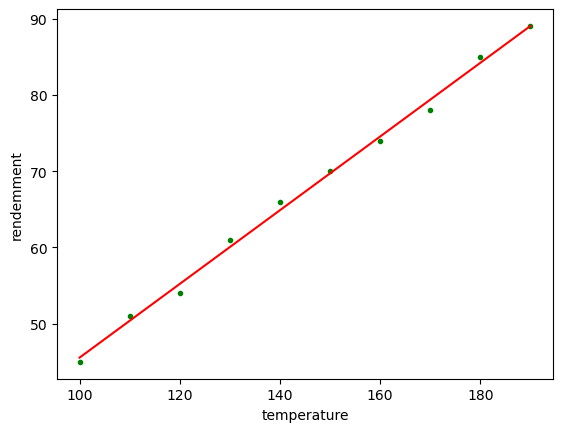

In [128]:
import matplotlib.pyplot as plt
#tracer les valeurs propres principauxmarker='o'
plt.plot(v1, v2,'.',color='g')
plt.plot(v1, getVal(v1,v1,v2),color='r')
plt.xlabel('temperature')
plt.ylabel('rendemment')
plt.show()

In [129]:
def getCorr(v,vi):
    m=getCov(v,vi)/(np.sqrt(getvar(v))*np.sqrt(getvar(vi)))
    return(m)

In [130]:
print(getCorr(v1,v2))

0.9981287179618071


In [131]:
def getDet(v,vi):
    m=np.square(getCorr(v,vi))
    return(m)

In [132]:
print(getDet(v1,v2))

0.9962609376200807


In [134]:
x1=ps.Series([105,180])
v11=ps.concat([v1,x1],ignore_index=True)
x2=ps.Series([70,70])
v22=ps.concat([v2,x2],ignore_index=True)


In [135]:
print(v11)

0     100
1     110
2     120
3     130
4     140
5     150
6     160
7     170
8     180
9     190
10    105
11    180
dtype: int64


In [136]:
#deuxieme variables
print(getDet(v11,v22))

0.7334777477210186


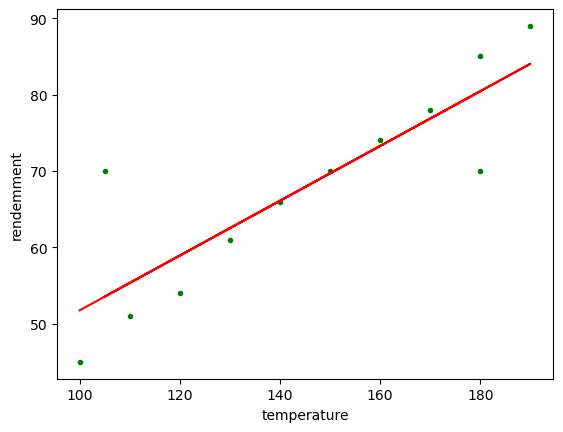

In [138]:
plt.plot(v11, v22,'.',color='g')
plt.plot(v11, getVal(v11,v11,v22),color='r')
plt.xlabel('temperature')
plt.ylabel('rendemment')
plt.show()